
# <span style="color:crimson">Milestone 1</span>

### <span style="color:#FFA500">Data Collection</span>

- **Data Source:** Kaggle – [Cardiovascular Disease Dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

### Information Gained:
- **Columns Overview:**
  - `age`: Age in days  
  - `gender`: 1 = female, 2 = male  
  - `height`: Height in cm  
  - `weight`: Weight in kg  
  - `ap_hi`: Systolic blood pressure  
  - `ap_lo`: Diastolic blood pressure  
  - `cholesterol`: 1 = normal, 2 = above normal, 3 = well above normal  
  - `gluc`: 1 = normal, 2 = above normal, 3 = well above normal  
  - `smoke`: 0 = non-smoker, 1 = smoker  
  - `alco`: 0 = no alcohol intake, 1 = consumes alcohol  
  - `active`: 0 = not physically active, 1 = active  
  - `cardio`: Target variable (0 = no disease, 1 = has disease)  

- The dataset contains 70,000 patient records with 12 predictive features and 1 target variable (cardio), making it large enough for training machine learning models.
- Features include **Patient characteristics** (age, gender, height, weight), **clinical measurements** (blood pressure, cholesterol, glucose), and **lifestyle indicators** (smoking, alcohol intake, physical activity).  
- This dataset is highly relevant for predictive modeling as it captures **major risk factors** for cardiovascular disease.
- Age is stored in days.  
- The dataset includes an id column, which is just a technical index and not useful for modeling. This will be dropped during preprocessing.

## <span style="color:#FFA500">Data Exploration (EDA)</span>

## Reading the data from a CSV file into a DataFrame using pandas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('cardio_train.csv', sep= ';' )
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Checking for NULL values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Checking for duplicates

In [4]:
df.duplicated().sum()

np.int64(0)

### key findings
- All columns are numeric.

- No missing values detected.

- No duplicates found

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## The values in Height , Weight , ap_hi and ap_lo these values need to be investigated further
#### 1) Height column
- ##### MIN value 55 cm 
- ##### MAX value 250 cm 

#### 2) Weight column
- ##### MIN value 10 kg
- ##### MAX value 200 kg

#### 3) ap_hi column (Systolic blood pressure)
- ##### Min value -150
- ##### MAX value 16020 

#### 4) ap_lo column (Diastolic blood pressure)
- ##### MIN value -70
- ##### MAX value 11000

### Judging by their min and max values we are sure that these columns need to be investigated for wrong entry or outliers

## Target Variable Balance

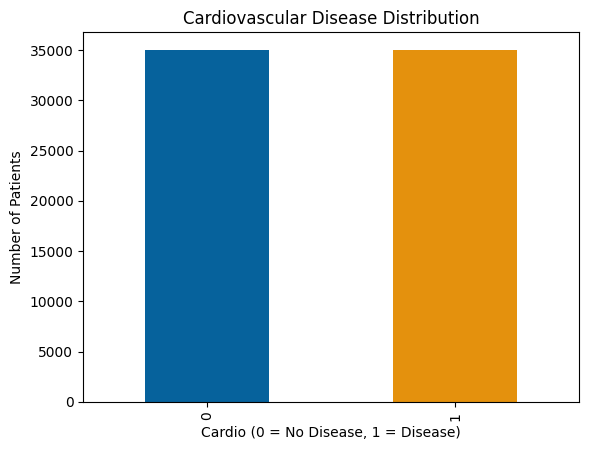

In [6]:
df['cardio'].value_counts().plot(kind="bar", color=["#06629C","#E4910D"])
plt.title("Cardiovascular Disease Distribution")
plt.xlabel("Cardio (0 = No Disease, 1 = Disease)")
plt.ylabel("Number of Patients")
plt.show()

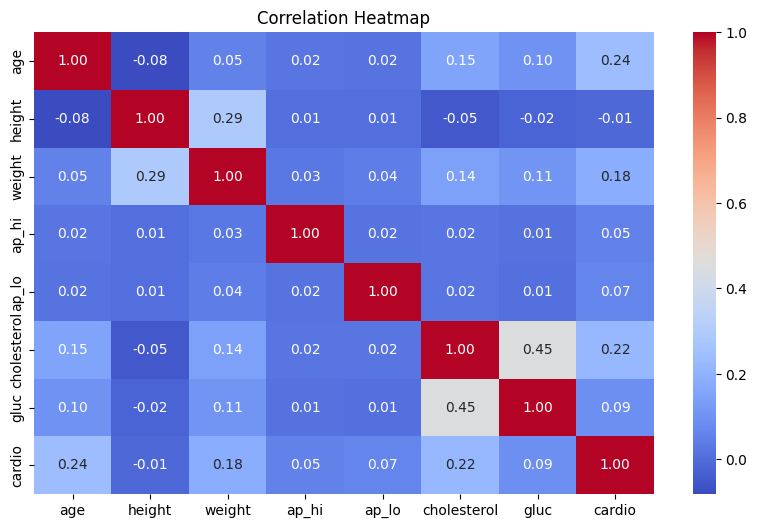

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['age','height','weight','ap_hi','ap_lo','cholesterol','gluc','cardio']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- Strongest correlations with cardio: Age (0.24), Cholesterol (0.22), Weight (0.18).

- Weak but possible: Glucose (0.09), Blood Pressure (likely distorted by outliers).

- Least relevant: Height.

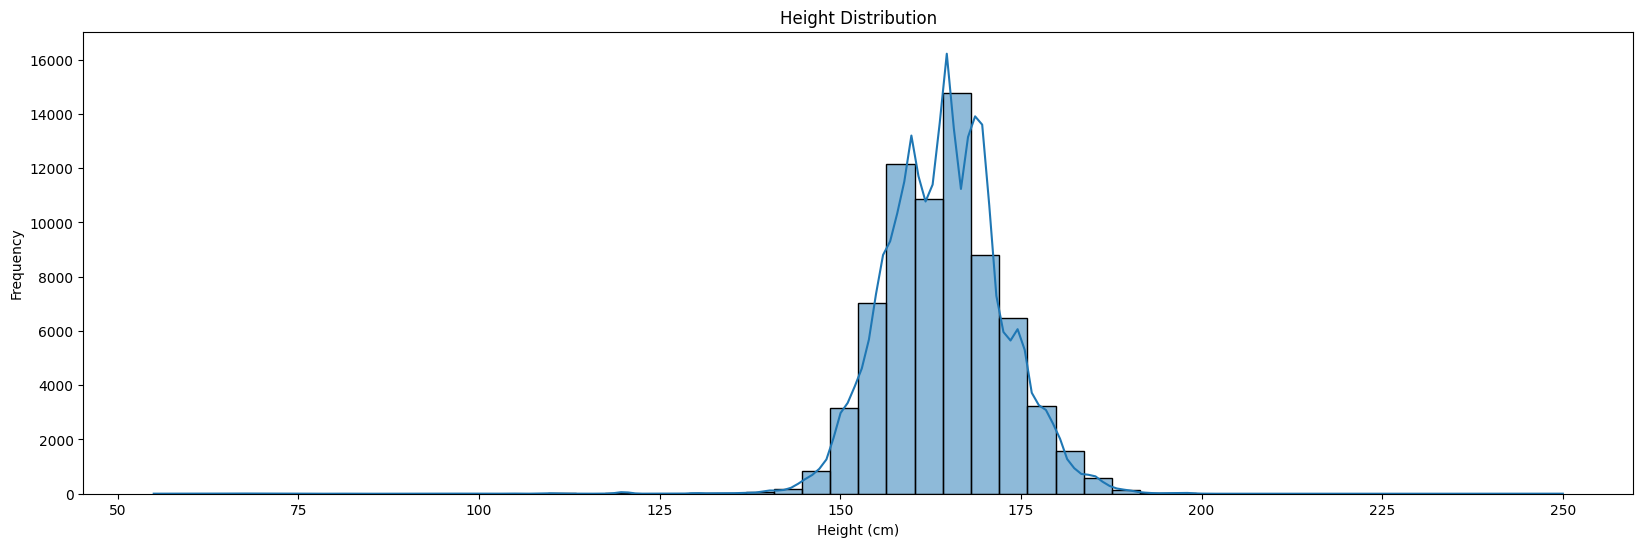

In [8]:
plt.figure(figsize=(20,6))
sns.histplot(df['height'], bins=50, kde=True)
plt.title("Height Distribution")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.show()

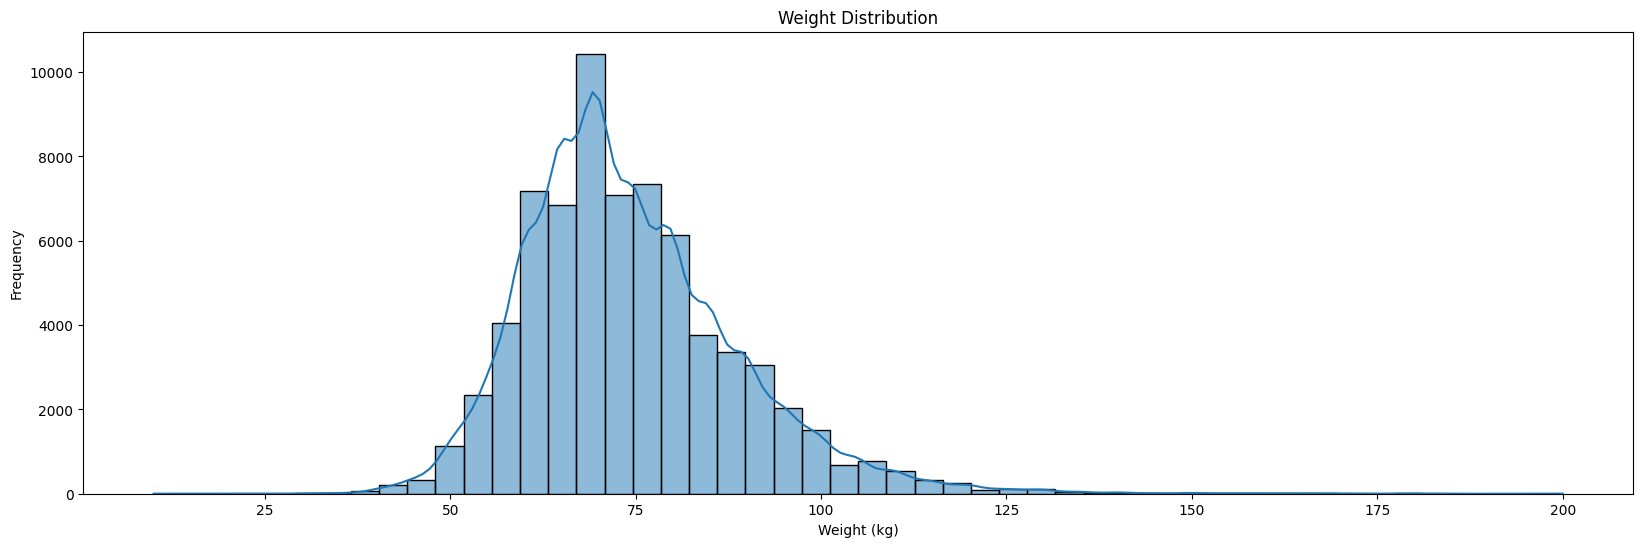

In [9]:
plt.figure(figsize=(20,6))
sns.histplot(df['weight'], bins=50, kde=True)
plt.title("Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.show()


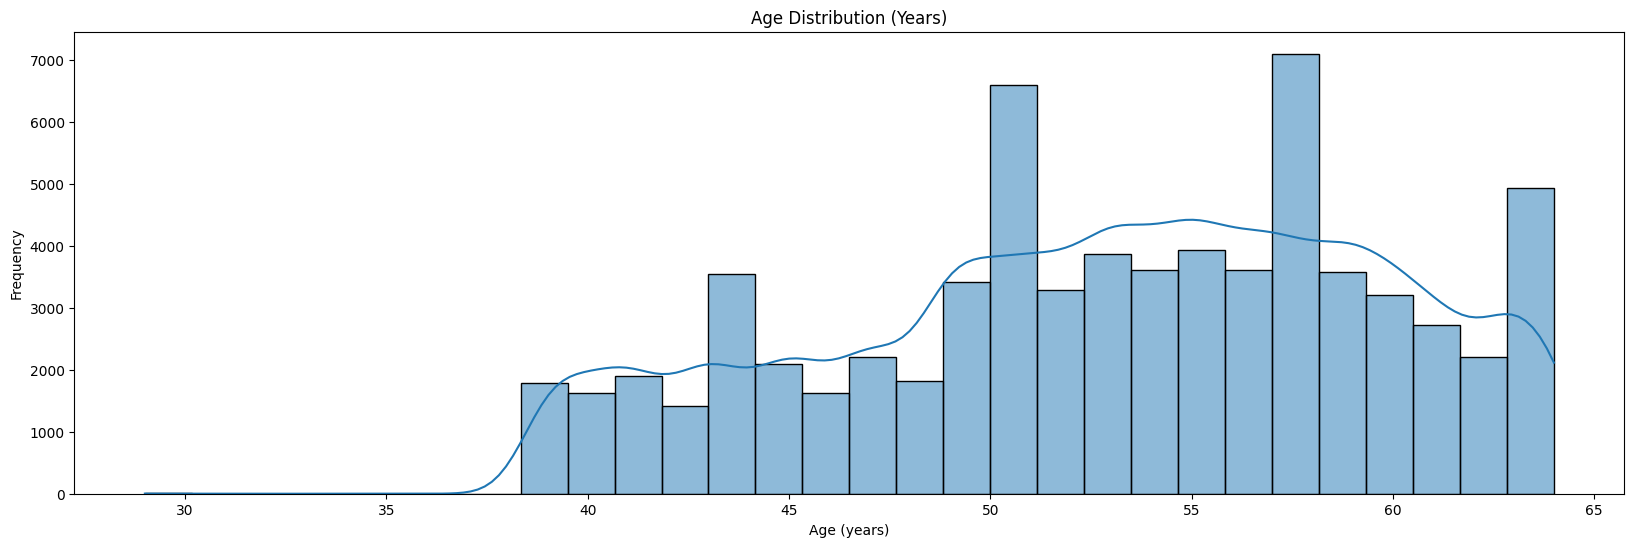

In [10]:
plt.figure(figsize=(20,6))
sns.histplot(df['age'] // 365, bins=30, kde=True)
plt.title("Age Distribution (Years)")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.show()



<Axes: title={'center': '1 = Female   2 = Male'}, xlabel='gender'>

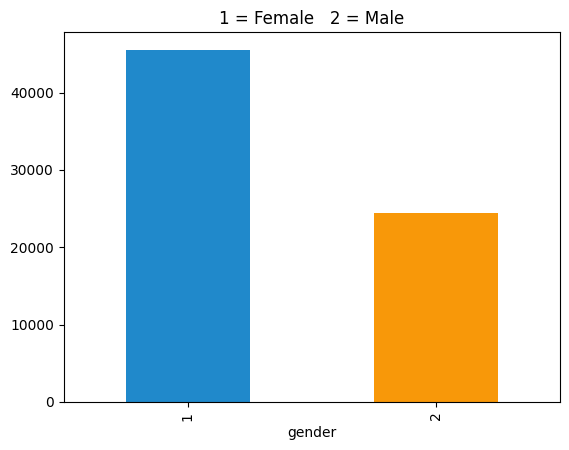

In [11]:
df['gender'].value_counts().plot(kind="bar", color=["#2089CB","#F89809"],title = '1 = Female   2 = Male')

<Axes: title={'center': '1 = Normal   2 = Above Normal   3 = Well Above Normal'}, xlabel='cholesterol'>

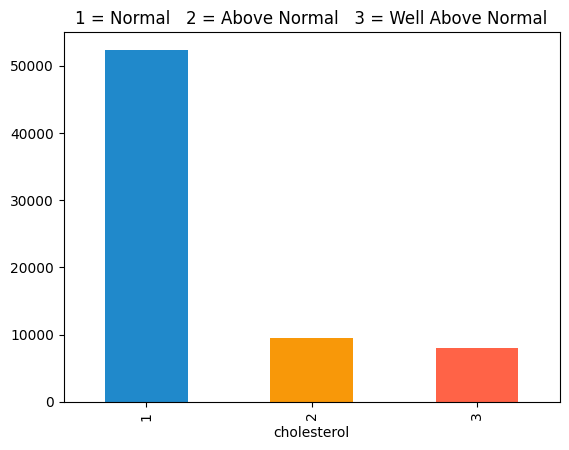

In [12]:
df['cholesterol'].value_counts().plot(kind="bar", color=["#2089CB","#F89809","#FF6347"],title = '1 = Normal   2 = Above Normal   3 = Well Above Normal')





<Axes: title={'center': '1 = Normal   2 = Above Normal   3 = Well Above Normal'}, xlabel='gluc'>

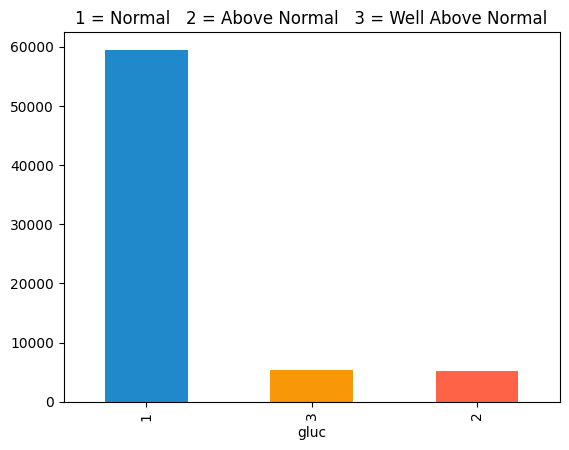

In [13]:
df['gluc'].value_counts().plot(kind="bar", color=["#2089CB","#F89809","#FF6347"],title = '1 = Normal   2 = Above Normal   3 = Well Above Normal')

<Axes: title={'center': '0 = No   1 = Yes'}, xlabel='smoke'>

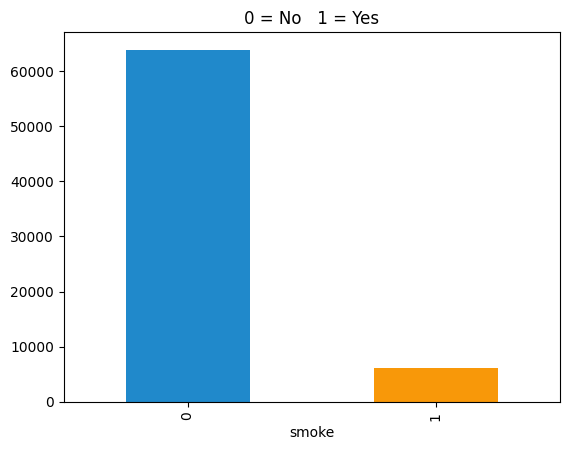

In [14]:
df['smoke'].value_counts().plot(kind="bar", color=["#2089CB","#F89809"],title = '0 = No   1 = Yes')

<Axes: title={'center': '0 = No   1 = Yes'}, xlabel='alco'>

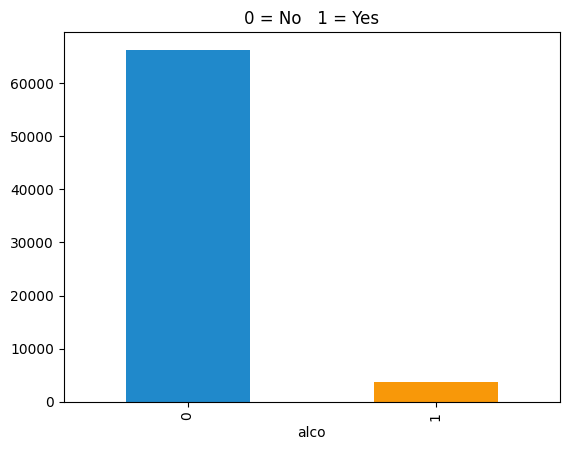

In [15]:
df['alco'].value_counts().plot(kind="bar", color=["#2089CB","#F89809"],title = '0 = No   1 = Yes')

<Axes: title={'center': '0 = No   1 = Yes'}, xlabel='active'>

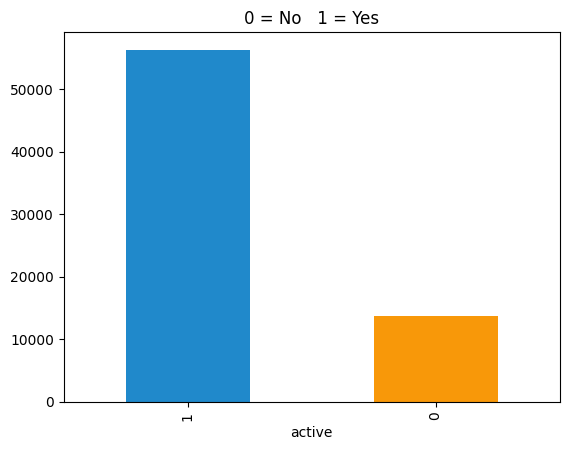

In [16]:
df['active'].value_counts().plot(kind="bar", color=["#2089CB","#F89809"],title = '0 = No   1 = Yes')

# <span style="color:#FFA500">Data Preprocessing</span>

## Converting Age column into years

In [17]:
df['age'] = (df['age'] // 365)
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df_before = df.copy()


## Next encode the Gender using one hot encoding method instead of 1 for Female and 2 for Male and dropping the old gender column

In [19]:
df["Male"] = (df["gender"] == 2).astype(int)
df["Female"] = (df["gender"] == 1).astype(int)
df.drop('gender',axis = 1, inplace = True)
df

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Male,Female
0,0,50,168,62.0,110,80,1,1,0,0,1,0,1,0
1,1,55,156,85.0,140,90,3,1,0,0,1,1,0,1
2,2,51,165,64.0,130,70,3,1,0,0,0,1,0,1
3,3,48,169,82.0,150,100,1,1,0,0,1,1,1,0
4,4,47,156,56.0,100,60,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,168,76.0,120,80,1,1,1,0,1,0,1,0
69996,99995,61,158,126.0,140,90,2,2,0,0,1,1,0,1
69997,99996,52,183,105.0,180,90,3,1,0,1,0,1,1,0
69998,99998,61,163,72.0,135,80,1,2,0,0,0,1,0,1


# Using Box Plot and Calculating IQR to visualize and find outliers For Weight, Height , ap_lo, ap_hi and age


## 1) Height column (Male)

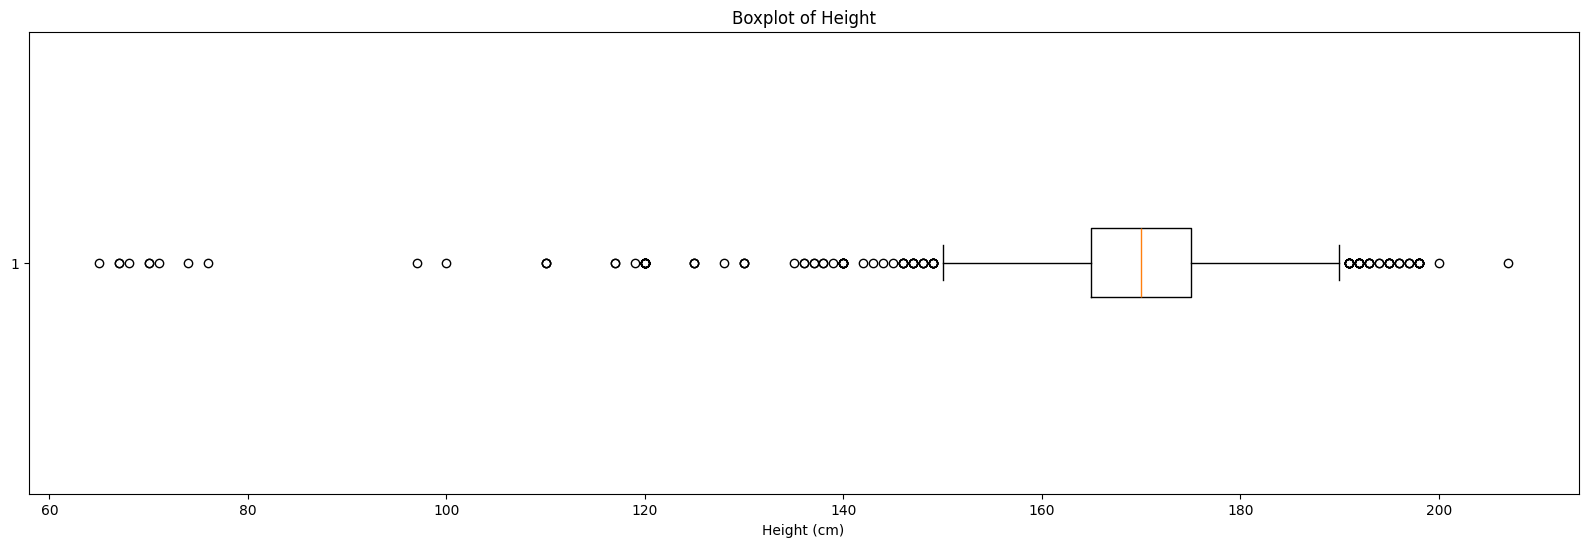

IQR : 10.0
lower_bound : 135.0
upper_bound : 205.0


In [20]:
df_male = df[df['Male'] == 1]
plt.figure(figsize=(20, 6))  
plt.boxplot(df_male["height"], vert=False)
plt.xlabel("Height (cm)")
plt.title("Boxplot of Height")
plt.show()
Q1 = df_male['height'].quantile(0.25)
Q3 = df_male['height'].quantile(0.75)

IQR = Q3 - Q1

print(f'IQR : {IQR}')

lower_bound = Q1 - IQR * 3
upper_bound = Q3 + IQR * 3
print(f'lower_bound : {lower_bound}')
print(f'upper_bound : {upper_bound}')

### Found 39 rows with height lower than 135 cm 

In [21]:
df_male[df_male['height'] < 135]['height'].value_counts().sum()

np.int64(39)

### Found 1 row with height higher than 205 cm 

In [22]:
df_male[df_male['height'] > 205]['height'].value_counts().sum()

np.int64(1)

### Remove 40 rows having wrong height

In [23]:
df_male = df_male[(df_male['height'] >= 135) & (df_male['height'] <= 205)]
df_male

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Male,Female
0,0,50,168,62.0,110,80,1,1,0,0,1,0,1,0
3,3,48,169,82.0,150,100,1,1,0,0,1,1,1,0
7,12,61,178,95.0,130,90,3,3,0,0,1,1,1,0
11,16,51,173,60.0,120,80,1,1,0,0,1,0,1,0
12,18,40,165,60.0,120,80,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,99972,47,182,110.0,130,90,2,2,0,0,1,1,1,0
69984,99975,49,168,80.0,120,80,1,1,0,0,1,1,1,0
69986,99978,49,180,78.0,120,80,1,1,0,0,1,0,1,0
69995,99993,52,168,76.0,120,80,1,1,1,0,1,0,1,0


## 2) Height column (Female)

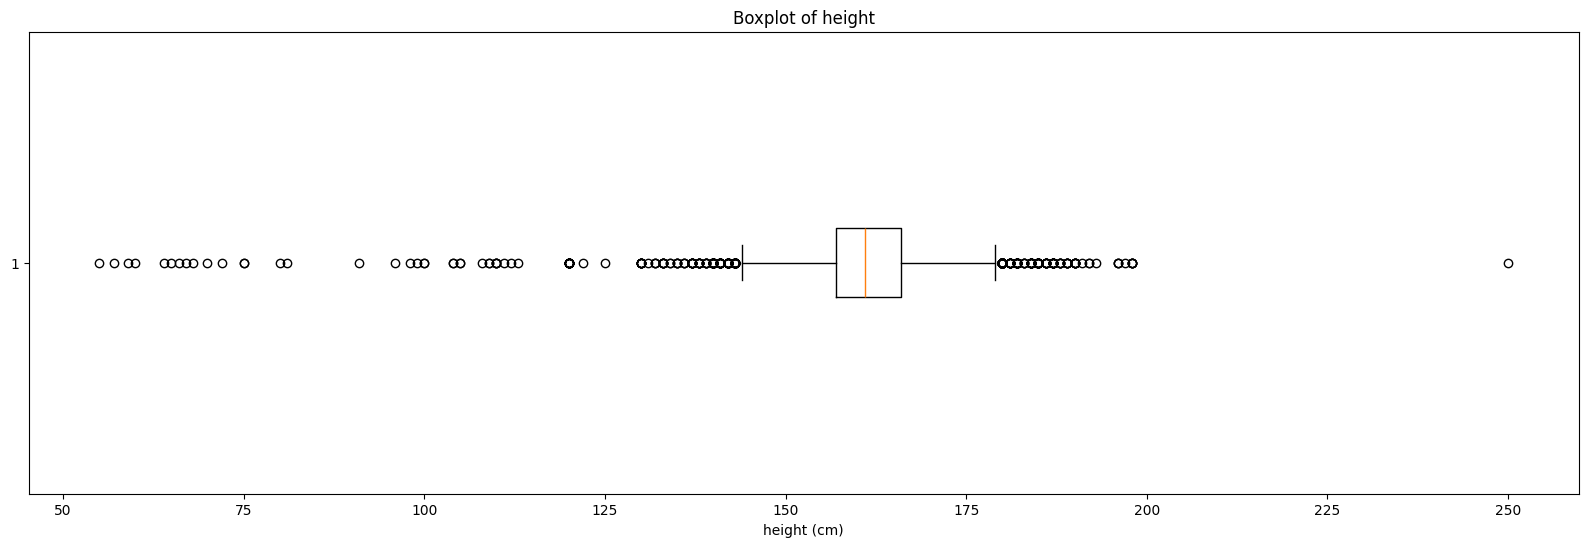

IQR : 9.0
lower_bound : 130.0
upper_bound : 193.0


In [24]:
df_female = df[df['Female'] == 1]
plt.figure(figsize=(20, 6))  
plt.boxplot(df_female["height"], vert=False)
plt.xlabel("height (cm)")
plt.title("Boxplot of height")
plt.show()
Q1 = df_female['height'].quantile(0.25)
Q3 = df_female['height'].quantile(0.75)

IQR = Q3 - Q1

print(f'IQR : {IQR}')

lower_bound = Q1 - IQR * 3
upper_bound = Q3 + IQR * 3

print(f'lower_bound : {lower_bound}')
print(f'upper_bound : {upper_bound}')

### Found 56 rows having height lower than 130 cm


In [25]:
df_female[df_female['height'] < 130]['height'].value_counts().sum()

np.int64(56)

### Found 10 rows having height higher than 193 cm

In [26]:
df_female[df_female['height'] > 193]['height'].value_counts().sum()

np.int64(10)

### Remove 66 rows from height column that contained wrong height

In [27]:
df_female = df_female[(df_female['height']>= 130) & (df_female['height'] <= 193)]
df_female

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Male,Female
1,1,55,156,85.0,140,90,3,1,0,0,1,1,0,1
2,2,51,165,64.0,130,70,3,1,0,0,0,1,0,1
4,4,47,156,56.0,100,60,1,1,0,0,0,0,0,1
5,8,60,151,67.0,120,80,2,2,0,0,0,0,0,1
6,9,60,157,93.0,130,80,3,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53,172,70.0,130,90,1,1,0,0,1,1,0,1
69994,99992,57,165,80.0,150,80,1,1,0,0,1,1,0,1
69996,99995,61,158,126.0,140,90,2,2,0,0,1,1,0,1
69998,99998,61,163,72.0,135,80,1,2,0,0,0,1,0,1


## Removed a total of 106 rows from height column

In [28]:
df = pd.concat([df_female,df_male])
df

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Male,Female
1,1,55,156,85.0,140,90,3,1,0,0,1,1,0,1
2,2,51,165,64.0,130,70,3,1,0,0,0,1,0,1
4,4,47,156,56.0,100,60,1,1,0,0,0,0,0,1
5,8,60,151,67.0,120,80,2,2,0,0,0,0,0,1
6,9,60,157,93.0,130,80,3,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,99972,47,182,110.0,130,90,2,2,0,0,1,1,1,0
69984,99975,49,168,80.0,120,80,1,1,0,0,1,1,1,0
69986,99978,49,180,78.0,120,80,1,1,0,0,1,0,1,0
69995,99993,52,168,76.0,120,80,1,1,1,0,1,0,1,0


### 3) Weight column

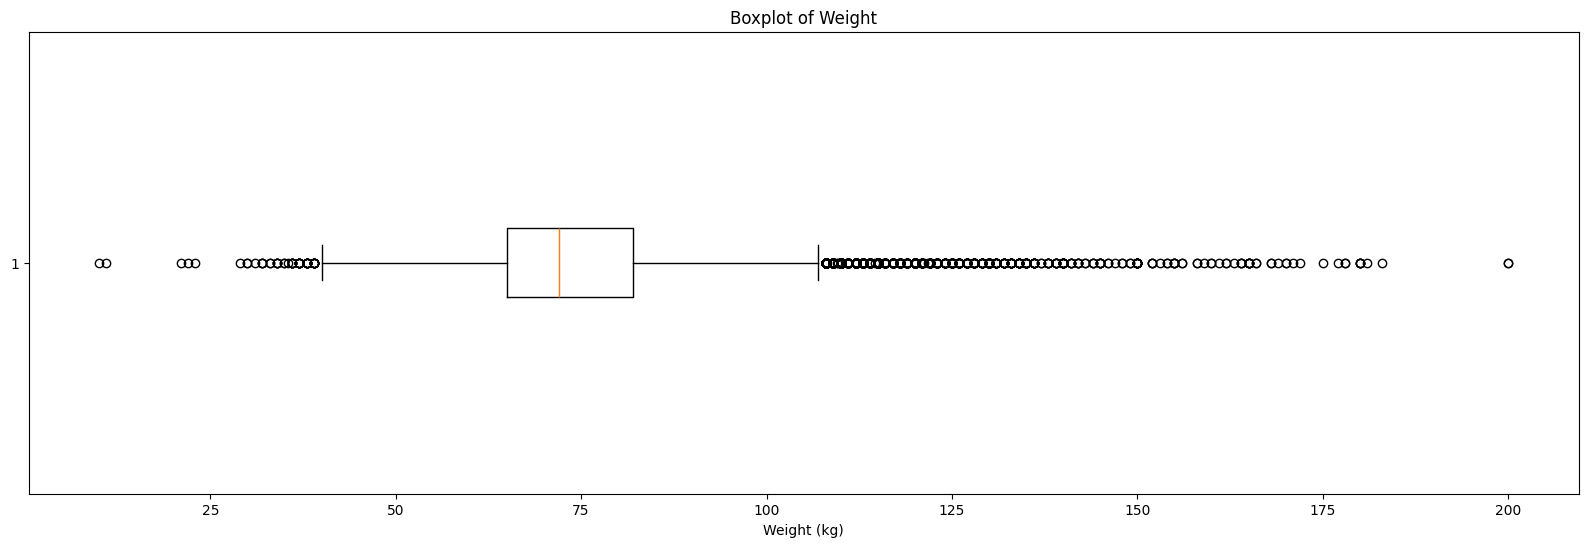

IQR : 17.0
lower_bound : 39.5
upper_bound : 107.5


In [29]:
plt.figure(figsize=(20, 6))  
plt.boxplot(df["weight"], vert=False)
plt.xlabel("Weight (kg)")
plt.title("Boxplot of Weight")
plt.show()
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)

IQR = Q3 - Q1

print(f'IQR : {IQR}')

lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

print(f'lower_bound : {lower_bound}')
print(f'upper_bound : {upper_bound}')

In [30]:
lower_bound = Q1 - IQR * 3
upper_bound = Q3 + IQR * 3
print(f'lower_bound : {lower_bound}')
print(f'upper_bound : {upper_bound}')

lower_bound : 14.0
upper_bound : 133.0


### Found 50 values lower than 40 kg

In [31]:
df[df['weight'] < 40]['weight'].value_counts().sum()

np.int64(50)

### Found 11 values higher than 175 kg

In [32]:
df[df['weight'] > 175]['weight'].value_counts().sum()

np.int64(11)

### Removed 61 values from weight column

In [33]:
df = df[(df['weight'] >= 40) & (df['weight'] <= 175)]
df

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Male,Female
1,1,55,156,85.0,140,90,3,1,0,0,1,1,0,1
2,2,51,165,64.0,130,70,3,1,0,0,0,1,0,1
4,4,47,156,56.0,100,60,1,1,0,0,0,0,0,1
5,8,60,151,67.0,120,80,2,2,0,0,0,0,0,1
6,9,60,157,93.0,130,80,3,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,99972,47,182,110.0,130,90,2,2,0,0,1,1,1,0
69984,99975,49,168,80.0,120,80,1,1,0,0,1,1,1,0
69986,99978,49,180,78.0,120,80,1,1,0,0,1,0,1,0
69995,99993,52,168,76.0,120,80,1,1,1,0,1,0,1,0


## 4) ap_lo column (Diastolic Blood Pressure)

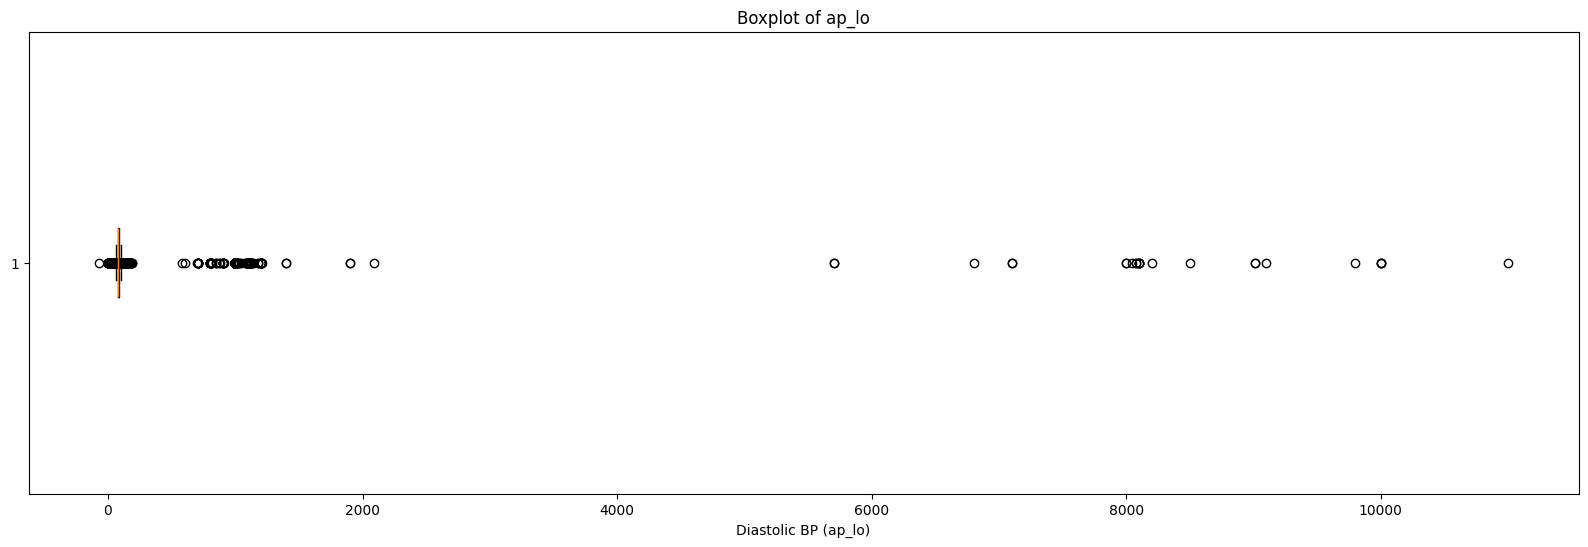

IQR : 10.0
lower_bound : 65.0
upper_bound : 105.0


In [34]:
plt.figure(figsize=(20, 6))  
plt.boxplot(df["ap_lo"], vert=False)
plt.xlabel("Diastolic BP (ap_lo)")
plt.title("Boxplot of ap_lo")
plt.show()

Q1 = df['ap_lo'].quantile(0.25)
Q3 = df['ap_lo'].quantile(0.75)

IQR = Q3 - Q1
print(f'IQR : {IQR}')

lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

print(f'lower_bound : {lower_bound}')
print(f'upper_bound : {upper_bound}')

In [35]:
lower_bound = Q1 - IQR * 3
upper_bound = Q3 + IQR * 3

print(f'lower_bound : {lower_bound}')
print(f'upper_bound : {upper_bound}')

lower_bound : 50.0
upper_bound : 120.0


### Found 58 rows that has Diastolic Blood Pressure lower than 40

In [36]:
df[df['ap_lo'] < 40]['ap_lo'].value_counts().sum()

np.int64(58)

### Found 978 rows that has Diastolic Blood Pressure higher than 140

In [37]:
df[df['ap_lo'] > 140]['ap_lo'].value_counts().sum()

np.int64(978)

### Remove 1036 rows that contained wrong Diastolic Blood Pressure

In [38]:
df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 140)]
df

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Male,Female
1,1,55,156,85.0,140,90,3,1,0,0,1,1,0,1
2,2,51,165,64.0,130,70,3,1,0,0,0,1,0,1
4,4,47,156,56.0,100,60,1,1,0,0,0,0,0,1
5,8,60,151,67.0,120,80,2,2,0,0,0,0,0,1
6,9,60,157,93.0,130,80,3,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,99972,47,182,110.0,130,90,2,2,0,0,1,1,1,0
69984,99975,49,168,80.0,120,80,1,1,0,0,1,1,1,0
69986,99978,49,180,78.0,120,80,1,1,0,0,1,0,1,0
69995,99993,52,168,76.0,120,80,1,1,1,0,1,0,1,0


## 5) ap_hi column (Systolic Blood Pressure)

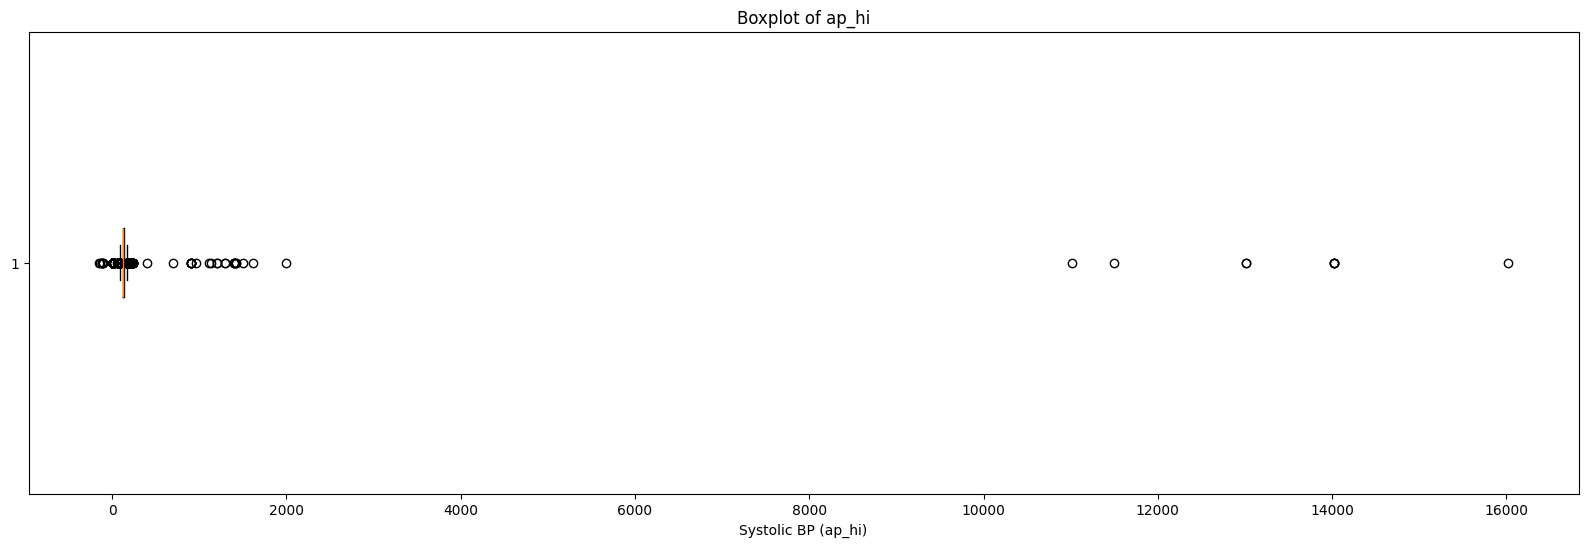

IQR : 20.0
lower_bound : 90.0
upper_bound : 170.0


In [39]:
plt.figure(figsize=(20, 6))  
plt.boxplot(df["ap_hi"], vert=False)
plt.xlabel("Systolic BP (ap_hi)")
plt.title("Boxplot of ap_hi")
plt.show()
Q1 = df['ap_hi'].quantile(0.25)
Q3 = df['ap_hi'].quantile(0.75)

IQR = Q3 - Q1
print(f'IQR : {IQR}')

lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

print(f'lower_bound : {lower_bound}')
print(f'upper_bound : {upper_bound}')



In [40]:
lower_bound = Q1 - IQR * 3
upper_bound = Q3 + IQR * 3

print(f'lower_bound : {lower_bound}')
print(f'upper_bound : {upper_bound}')


lower_bound : 60.0
upper_bound : 200.0


## Found 193 rows that has wrong Systolic Blood Pressure

In [41]:
df[df['ap_hi'] < 80]['ap_hi'].value_counts().sum()

np.int64(193)

## Found 33 rows that has Systolic Blood Pressure higher than 240

In [42]:
df[df['ap_hi'] > 240]['ap_hi'].value_counts().sum()

np.int64(33)

## Remove 226 rows that contain wrong Systolic Blood Pressure

In [43]:
df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 240)]

## 6) Removing rows having higher Diastolic Pressure than the Systolic Pressure

### Found 70 rows having wrong values

In [44]:
df[(df['ap_hi'] <= df['ap_lo'])].value_counts().sum()

np.int64(70)

### Removing 70 rows from ap_hi and ap_lo columns

In [45]:
df = df[(df['ap_hi'] > df['ap_lo'])]

## 7) Age column

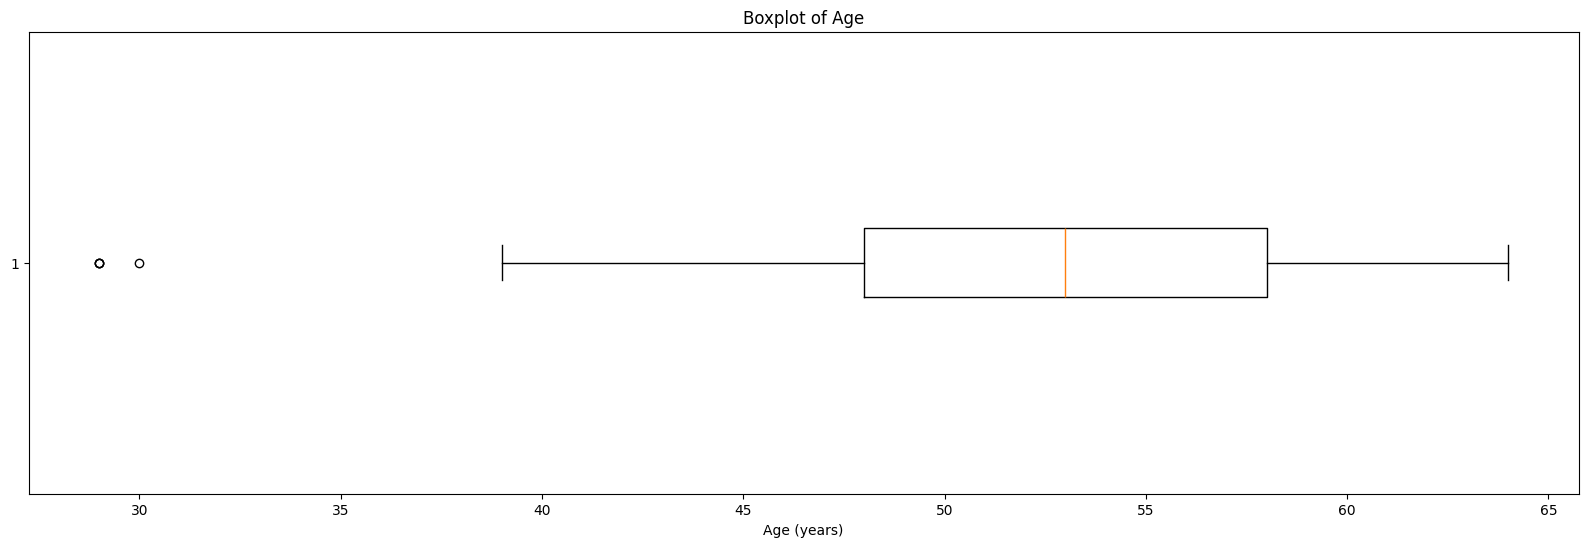

IQR : 10.0
lower_bound : 33.0
upper_bound : 73.0


In [46]:
plt.figure(figsize=(20, 6))  
plt.boxplot(df["age"], vert=False)
plt.xlabel("Age (years)")
plt.title("Boxplot of Age")
plt.show()

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1
print(f'IQR : {IQR}')

lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

print(f'lower_bound : {lower_bound}')
print(f'upper_bound : {upper_bound}')

### Found 4 rows that has age lower than 33 years

In [47]:
df[df['age']< 33]['age'].value_counts().sum()

np.int64(4)

### Found 0 rows that ahs age higher than 73 years

In [48]:
df[df['age'] > 73]['age'].value_counts().sum()

np.int64(0)

## Remove 4 rows from age column

In [49]:
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Removed total of 1503 rows now we have 68497 row

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68497 entries, 1 to 69997
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68497 non-null  int64  
 1   age          68497 non-null  int64  
 2   height       68497 non-null  int64  
 3   weight       68497 non-null  float64
 4   ap_hi        68497 non-null  int64  
 5   ap_lo        68497 non-null  int64  
 6   cholesterol  68497 non-null  int64  
 7   gluc         68497 non-null  int64  
 8   smoke        68497 non-null  int64  
 9   alco         68497 non-null  int64  
 10  active       68497 non-null  int64  
 11  cardio       68497 non-null  int64  
 12  Male         68497 non-null  int64  
 13  Female       68497 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.8 MB


## Remove 4 rows from age column

Below lower bound: 4 (0.01% of data)
Above upper bound: 0 (0.00% of data)
Lower Bound: 33.0 Upper Bound: 73.0


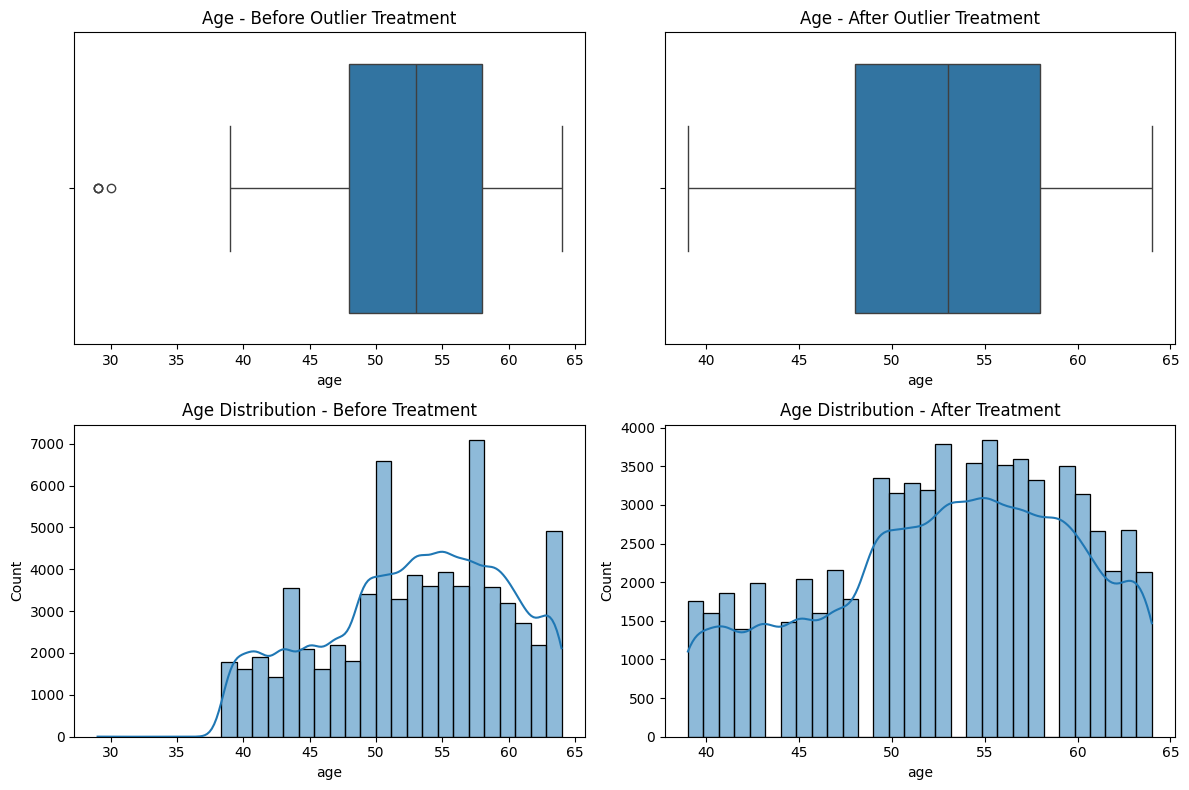

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns



Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1

Age_lower_bound = Q1 - 1.5 * IQR
Age_upper_bound = Q3 + 1.5 * IQR

age_below_lower = (df_before["age"] < Age_lower_bound).sum()
age_above_upper = (df_before["age"] > Age_upper_bound).sum()
age_total = len(df["age"])

print(f"Below lower bound: {age_below_lower} ({age_below_lower/age_total:.2%} of data)")
print(f"Above upper bound: {age_above_upper} ({age_above_upper/age_total:.2%} of data)")
print("Lower Bound:", Age_lower_bound, "Upper Bound:", Age_upper_bound)


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(x=df_before['age'])  # use original values
plt.title("Age - Before Outlier Treatment")

plt.subplot(2,2,2)
sns.boxplot(x=df["age"])  # after capping
plt.title("Age - After Outlier Treatment")

plt.subplot(2,2,3)
sns.histplot(df_before['age'], bins=30, kde=True)
plt.title("Age Distribution - Before Treatment")

plt.subplot(2,2,4)
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution - After Treatment")

plt.tight_layout()
plt.show()


In [52]:
df_before

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [53]:
for g in sorted(df_before['gender'].unique()):
    gender_name = "Female" if g == 1 else "Male"

    subset = df_before[df_before["gender"] == g]

    Height_Q1 = subset["height"].quantile(0.25)
    Height_Q3 = subset["height"].quantile(0.75)
    Height_IQR = Height_Q3 - Height_Q1

    Height_lower_bound = Height_Q1 - 1.5 * Height_IQR
    Height_upper_bound = Height_Q3 + 1.5 * Height_IQR

    Height_below = (subset["height"] < Height_lower_bound).sum()
    Height_above = (subset["height"] > Height_upper_bound).sum()
    Height_total = len(subset)

    print(f"\n📊 {gender_name} (n={Height_total}):")
    print(f"   Lower Bound = {Height_lower_bound:.1f}, Upper Bound = {Height_upper_bound:.1f}")
    print(f"   Below lower whisker: {Height_below} ({Height_below/Height_total:.2%} of data)")
    print(f"   Above upper whisker: {Height_above} ({Height_above/Height_total:.2%} of data)")


📊 Female (n=45530):
   Lower Bound = 143.5, Upper Bound = 179.5
   Below lower whisker: 239 (0.52% of data)
   Above upper whisker: 258 (0.57% of data)

📊 Male (n=24470):
   Lower Bound = 150.0, Upper Bound = 190.0
   Below lower whisker: 81 (0.33% of data)
   Above upper whisker: 50 (0.20% of data)


Dropped 0 rows with unrealistic heights.


C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_16132\1075351876.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="height", data=df_before, palette="Set2")
C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_16132\1075351876.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="height", data=df_gender, palette="Set2", showfliers=False)


Text(0.5, 1.0, 'Height After Outlier Treatment')

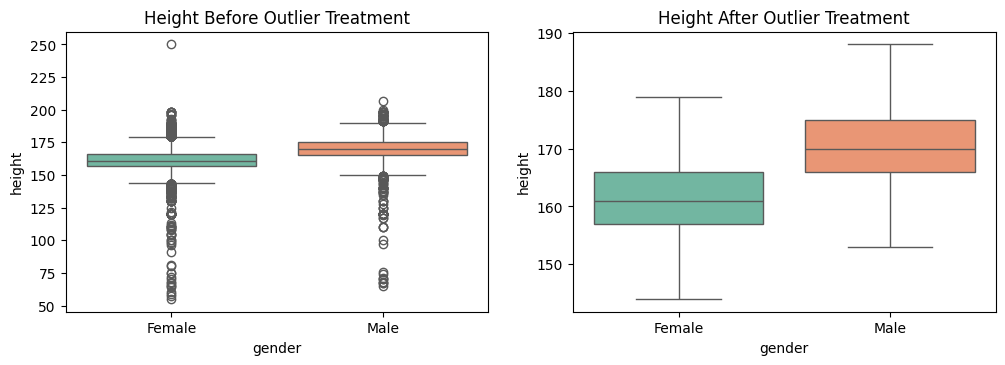

In [54]:
# Define realistic boundaries
female_min, female_max = 130, 193
male_min, male_max     = 135, 205

before_drop = len(df)

df_gender = df_before[
    ((df_before["gender"] == 1) & (df_before["height"].between(female_min, female_max))) |  
    ((df_before["gender"] == 2) & (df_before["height"].between(male_min, male_max)))        
]

after_drop = len(df)

print(f"Dropped {before_drop - after_drop} rows with unrealistic heights.")

plt.figure(figsize=(12,8))

# Row 1: Boxplots
plt.subplot(2,2,1)
sns.boxplot(x="gender", y="height", data=df_before, palette="Set2")
plt.xticks([0,1], ["Female", "Male"])
plt.title("Height Before Outlier Treatment")

plt.subplot(2,2,2)
sns.boxplot(x="gender", y="height", data=df_gender, palette="Set2", showfliers=False)
plt.xticks([0,1], ["Female", "Male"])
plt.title("Height After Outlier Treatment")

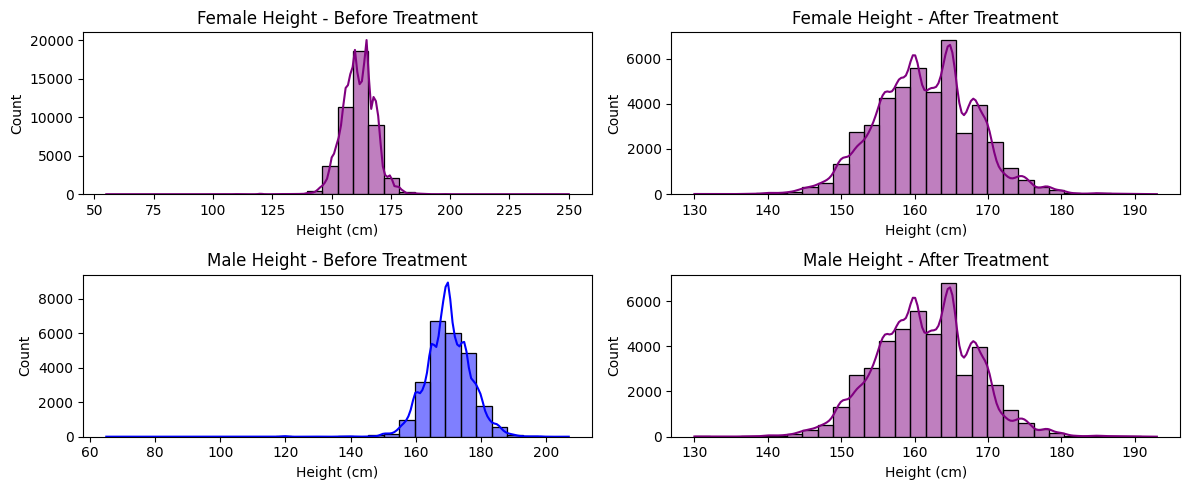

In [55]:
plt.figure(figsize=(12,5))

plt.subplot(2,2,1)
sns.histplot(df_before[df_before["gender"]==1]["height"], bins=30, kde=True, color="purple")
plt.title("Female Height - Before Treatment")
plt.xlabel("Height (cm)")
plt.ylabel("Count")

plt.subplot(2,2,2)
sns.histplot(
    df_before[(df_before["gender"]==1) & (df_before["height"].between(female_min, female_max))]["height"],
    bins=30, kde=True, color="purple"
)
plt.title("Female Height - After Treatment")
plt.xlabel("Height (cm)")
plt.ylabel("Count")

# Row 2: Male
plt.subplot(2,2,3)
sns.histplot(df_before[df_before["gender"]==2]["height"], bins=30, kde=True, color="blue")
plt.title("Male Height - Before Treatment")
plt.xlabel("Height (cm)")
plt.ylabel("Count")

plt.subplot(2,2,4)
sns.histplot(
    df_gender[(df_gender["gender"]==1) & (df_gender["height"].between(female_min, female_max))]["height"],
    bins=30, kde=True, color="purple"
)
plt.title("Male Height - After Treatment")
plt.xlabel("Height (cm)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Dropped 1503 rows outside [40, 175]


Text(0.5, 1.0, 'Weight - After Outlier Treatment')

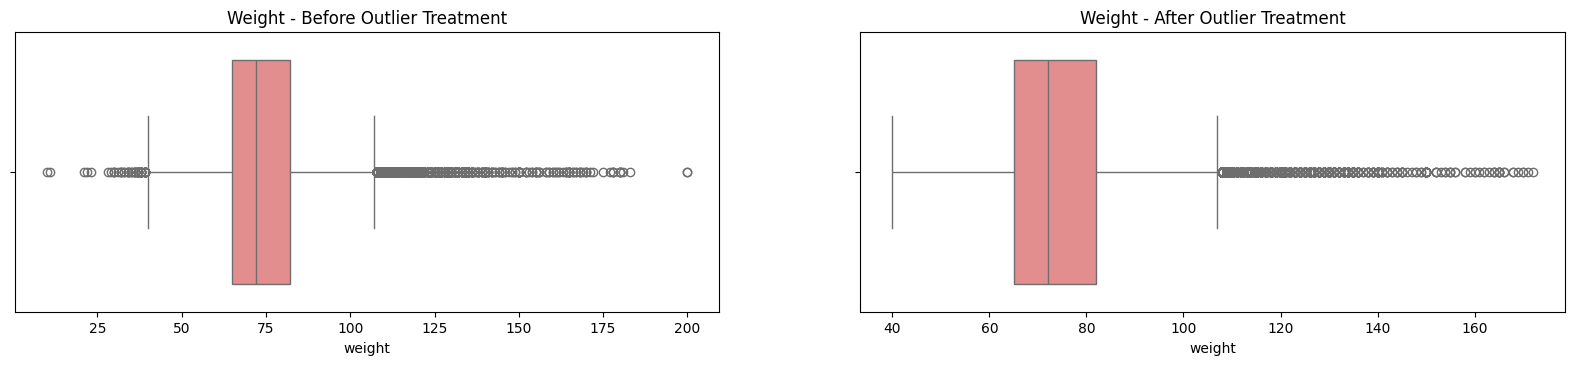

In [56]:

before_drop = len(df_before)



after_drop = len(df)

print(f"Dropped {before_drop - after_drop} rows outside [{40}, 175]")

plt.figure(figsize=(20,8))
# --- Visualization ---
plt.subplot(2,2,1)
sns.boxplot(x=df_before["weight"], color="lightcoral")
plt.title("Weight - Before Outlier Treatment")

plt.subplot(2,2,2)
sns.boxplot(x=df["weight"], color="lightcoral")
plt.title("Weight - After Outlier Treatment")


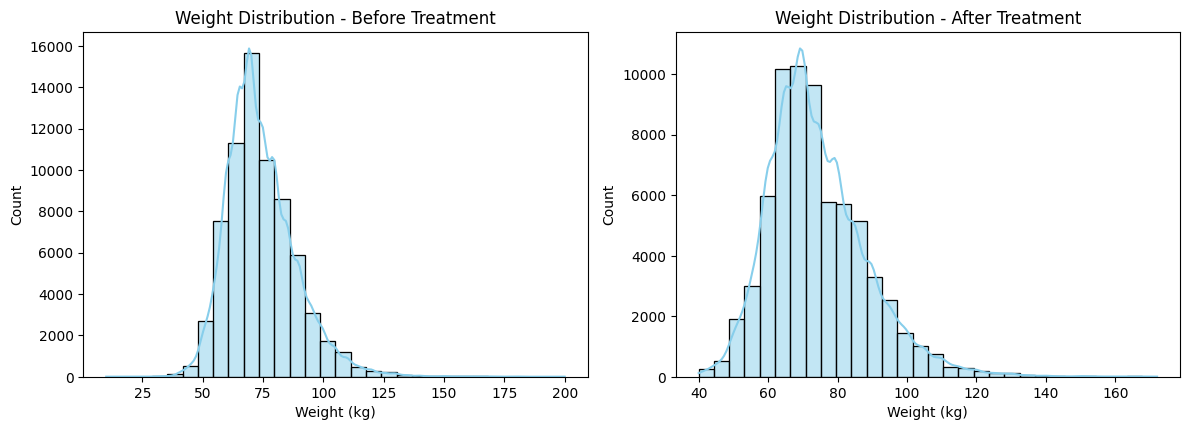

In [57]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,3)
sns.histplot(df_before["weight"], bins=30, kde=True, color="skyblue")
plt.title("Weight Distribution - Before Treatment")
plt.xlabel("Weight (kg)")
plt.ylabel("Count")

plt.subplot(2,2,4)
sns.histplot(df["weight"], bins=30, kde=True, color="skyblue")
plt.title("Weight Distribution - After Treatment")
plt.xlabel("Weight (kg)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Dropped 1503 rows with ap_hi outside [80, 240]


C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_16132\1919951508.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_16132\1919951508.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


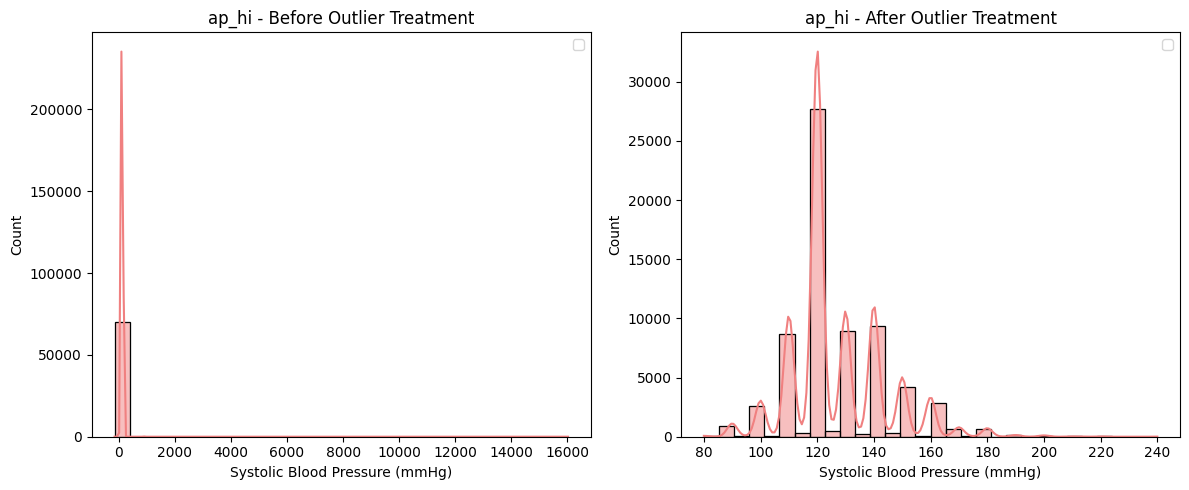

In [58]:
before_drop = len(df_before)



after_drop = len(df)
print(f"Dropped {before_drop - after_drop} rows with ap_hi outside [80, 240]")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_before["ap_hi"], bins=30, kde=True, color="lightcoral", edgecolor="black")
plt.title("ap_hi - Before Outlier Treatment")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.legend()

plt.subplot(1,2,2)
sns.histplot(df["ap_hi"], bins=30, kde=True, color="lightcoral", edgecolor="black")
plt.title("ap_hi - After Outlier Treatment")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()

Dropped 1503 rows with ap_lo outside [40, 140]


C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_16132\3674065905.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_16132\3674065905.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


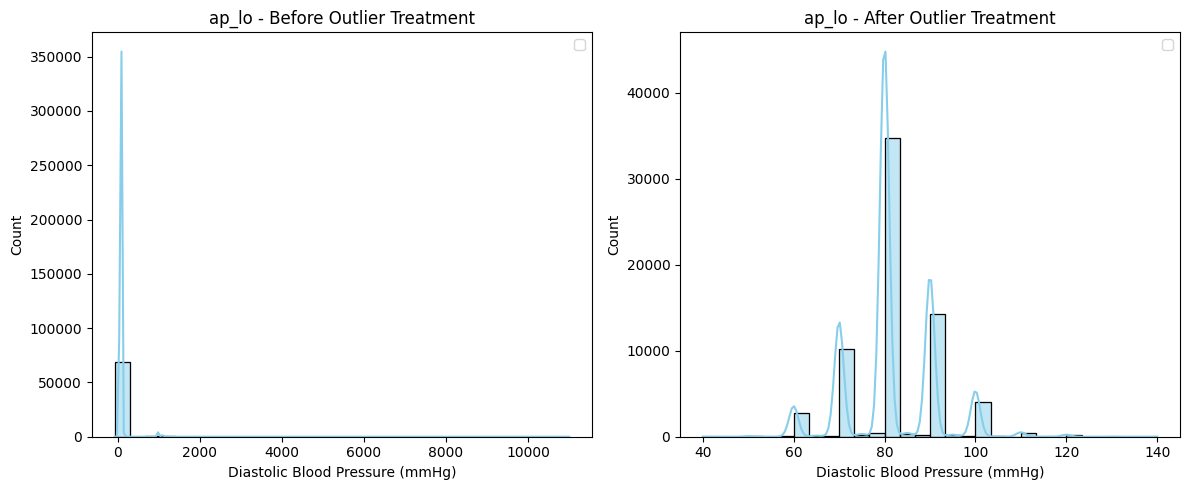

In [59]:
before_drop = len(df_before)

after_drop = len(df)
print(f"Dropped {before_drop - after_drop} rows with ap_lo outside [40, 140]")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_before["ap_lo"], bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("ap_lo - Before Outlier Treatment")
plt.xlabel("Diastolic Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.legend()

plt.subplot(1,2,2)
sns.histplot(df["ap_lo"], bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("ap_lo - After Outlier Treatment")
plt.xlabel("Diastolic Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()

<Axes: title={'center': 'BMI Distribution'}, ylabel='Frequency'>

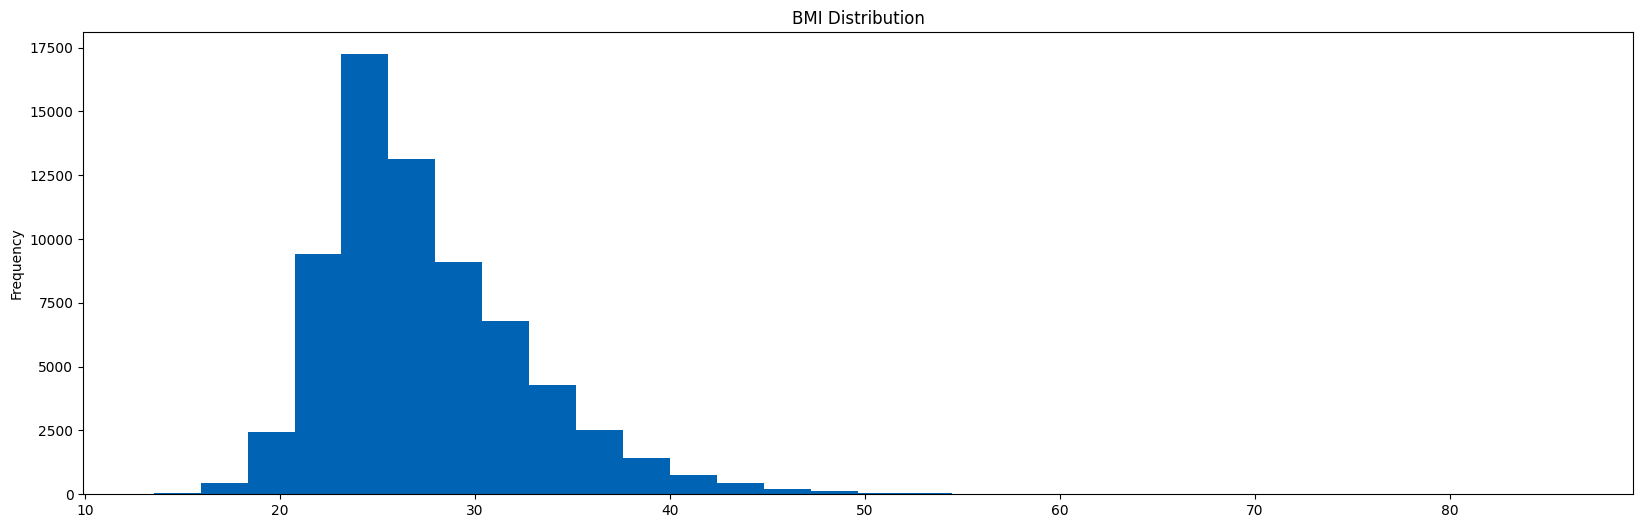

In [60]:
df['bmi'] = df['weight'] / ((df['height']/100) ** 2)
df['bmi'].plot(kind="hist", bins=30, color="#0063B4", title="BMI Distribution",figsize=(20,6))

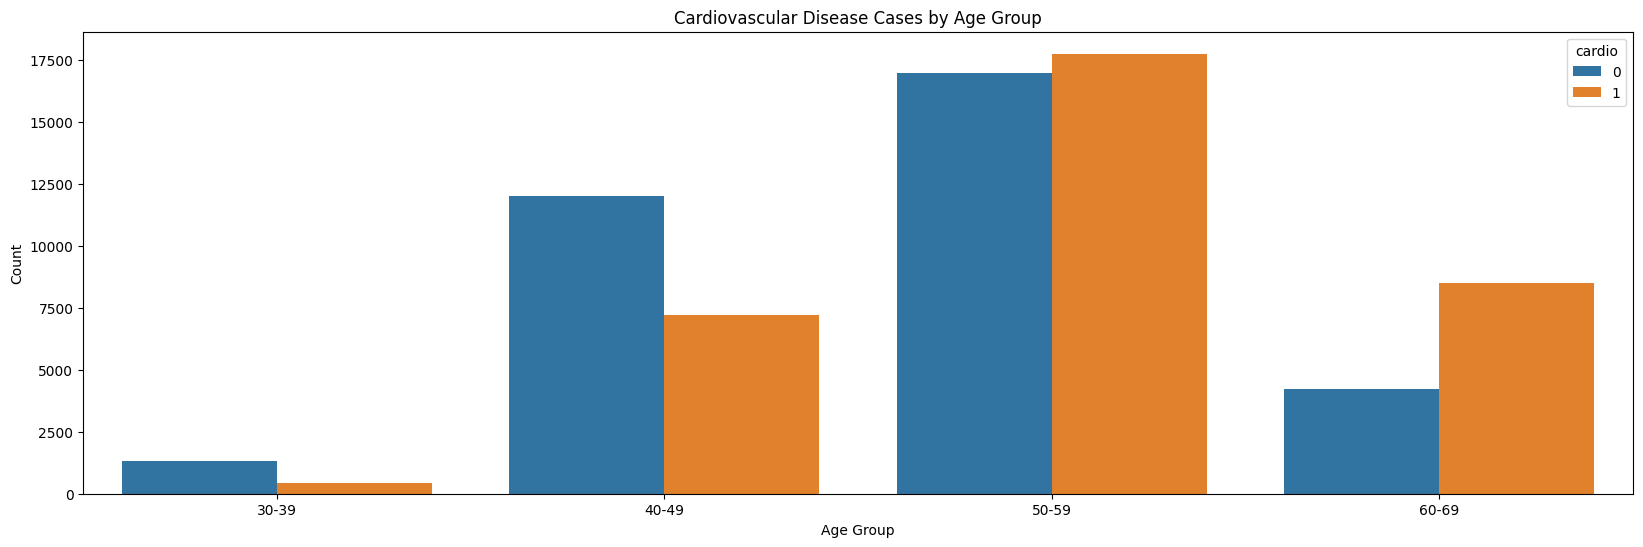

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

bins = [29, 39, 49, 59, 69]
labels = ['30-39', '40-49', '50-59', '60-69']

plt.figure(figsize=(20,6))
sns.countplot(
    x=pd.cut(df['age'], bins=bins, labels=labels), 
    hue='cardio', 
    data=df
)
plt.title("Cardiovascular Disease Cases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [62]:
df = df.drop(columns=['id'])
df

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Male,Female,bmi
1,55,156,85.0,140,90,3,1,0,0,1,1,0,1,34.927679
2,51,165,64.0,130,70,3,1,0,0,0,1,0,1,23.507805
4,47,156,56.0,100,60,1,1,0,0,0,0,0,1,23.011177
5,60,151,67.0,120,80,2,2,0,0,0,0,0,1,29.384676
6,60,157,93.0,130,80,3,1,0,0,1,0,0,1,37.729725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,47,182,110.0,130,90,2,2,0,0,1,1,1,0,33.208550
69984,49,168,80.0,120,80,1,1,0,0,1,1,1,0,28.344671
69986,49,180,78.0,120,80,1,1,0,0,1,0,1,0,24.074074
69995,52,168,76.0,120,80,1,1,1,0,1,0,1,0,26.927438


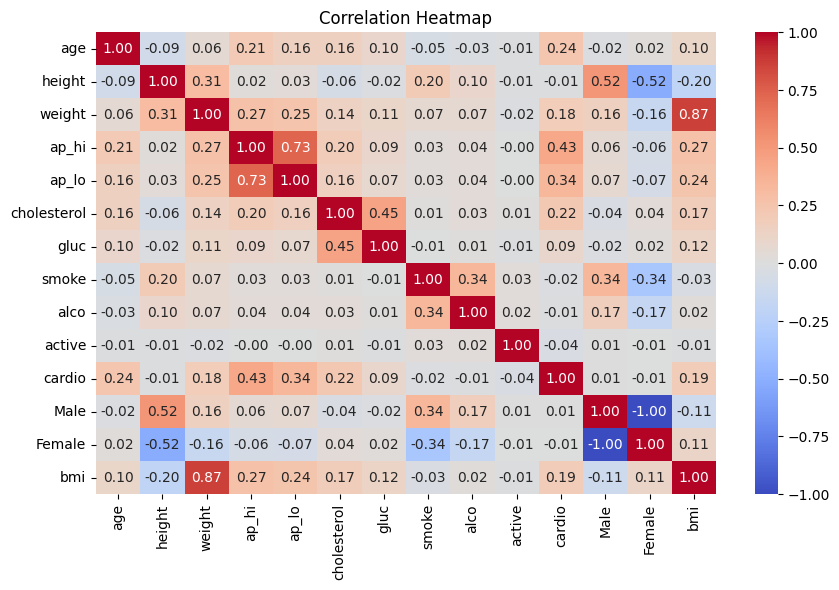

In [63]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [64]:
columns = ['age','height','weight','ap_hi','ap_lo','bmi']
for col in columns:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    print(f"{col} - Mean: {mean:.2f}, Median: {median}, Mode: {mode}")

age - Mean: 52.83, Median: 53.0, Mode: 55
height - Mean: 164.44, Median: 165.0, Mode: 165
weight - Mean: 74.12, Median: 72.0, Mode: 65.0
ap_hi - Mean: 126.68, Median: 120.0, Mode: 120
ap_lo - Mean: 81.31, Median: 80.0, Mode: 80
bmi - Mean: 27.45, Median: 26.346494034400994, Mode: 23.875114784205696


## Standardization ensures that:
    - All numeric features have mean = 0 and std = 1.
    - Large-scale features (like age in days or systolic BP) don’t dominate smaller ones (like BMI).
- ### We apply standardization (zero mean, unit variance) to numeric features (age_years, height, weight, ap_hi, ap_lo, bmi). StandardScaler from scikit-learn is used, which is common for ML preprocessing.

In [65]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

sd_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo','bmi']
min_max_df = df.copy()
sd_df = df.copy()
min_max_df[num_cols] = min_max_scaler.fit_transform(df[num_cols])
sd_df[num_cols] = sd_scaler.fit_transform(df[num_cols])

In [66]:
sd_df.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Male,Female,bmi
count,6.849700e+04,6.849700e+04,6.849700e+04,6.849700e+04,6.849700e+04,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,6.849700e+04
mean,-1.958487e-16,-9.228124e-16,-4.979204e-18,-3.858883e-16,4.630659e-16,1.364863,1.225762,0.088033,0.053345,0.803349,0.494854,0.348701,0.651299,-3.194989e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.679020,0.571643,0.283345,0.224723,0.397469,0.499977,0.476563,0.476563,1.000007e+00
min,-2.043901e+00,-4.402050e+00,-2.402485e+00,-2.800949e+00,-4.390523e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.685287e+00
25%,-7.138240e-01,-6.953867e-01,-6.421399e-01,-4.009242e-01,-1.390479e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-6.885483e-01
50%,2.510751e-02,7.150918e-02,-1.492432e-01,-4.009242e-01,-1.390479e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-2.119635e-01
75%,7.640390e-01,7.105891e-01,5.548950e-01,7.990883e-01,9.238208e-01,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.149953e-01
max,1.650757e+00,4.289436e+00,6.892139e+00,6.799151e+00,6.238164e+00,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.124924e+01


In [67]:
sd_df.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Male,Female,bmi
1,0.320680,-1.078835,0.766137,0.799088,0.923821,3,1,0,0,1,1,0,1,1.442846
2,-0.270465,0.071509,-0.712554,0.199082,-1.201917,3,1,0,0,0,1,0,1,-0.759381
4,-0.861610,-1.078835,-1.275864,-1.600937,-2.264785,1,1,0,0,0,0,0,1,-0.855151
5,1.059612,-1.717915,-0.501312,-0.400924,-0.139048,2,2,0,0,0,0,0,1,0.373924
6,1.059612,-0.951019,1.329447,0.199082,-0.139048,3,1,0,0,1,0,0,1,1.983197


In [68]:
min_max_df.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Male,Female,bmi
count,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000,68497.000000
mean,0.553204,0.506478,0.258481,0.291763,0.413082,1.364863,1.225762,0.088033,0.053345,0.803349,0.494854,0.348701,0.651299,0.192707
std,0.270663,0.115056,0.107590,0.104166,0.094086,0.679020,0.571643,0.283345,0.224723,0.397469,0.499977,0.476563,0.476563,0.071765
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.426471,0.189394,0.250000,0.400000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.143294
50%,0.560000,0.514706,0.242424,0.250000,0.400000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.177496
75%,0.760000,0.588235,0.318182,0.375000,0.500000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.229666
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Finally, we save the cleaned dataset to CSV:

In [69]:
df.to_csv('cardio_cleaned.csv', index=False)
min_max_df.to_csv('cardio_cleaned_normalized.csv', index=False)
sd_df.to_csv('cardio_cleaned_sd.csv', index=False)